Image shape: (1365, 2048, 3)
Image shape: (1365, 2048)


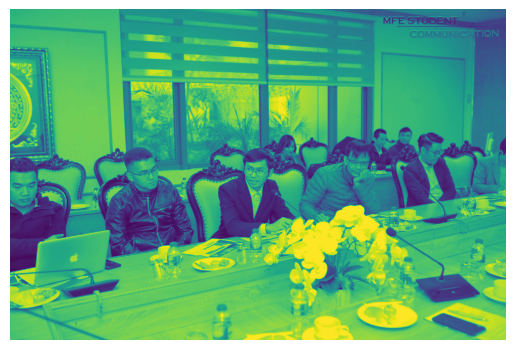

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import urllib.request
from io import BytesIO


url = str('https://imgur.com/nmGz7Lv.png')
with urllib.request.urlopen(url) as url:
    f = BytesIO(url.read())

X = np.array(Image.open(f))
print('Image shape: %s'%str(X.shape))

# Convert to gray

X = X.dot([0.299, 0.5870, 0.114])
print('Image shape: %s'%str(X.shape))
plt.imshow(X)
plt.axis('off')
plt.show()



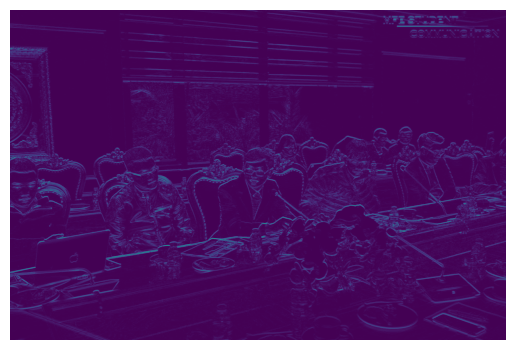

In [2]:
# Horizontal filter
F1 = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

# Convolution 2 dimensions

def conv2d(X, F, s=1, p=0):
    """
    X: input matrix
    F: filter matrix
    s: Step size
    p: padding size
    """

    (w1, h1) = X.shape
    f = F.shape[0]
    w2 = int((w1 + 2*p -f)/s) + 1
    h2 = int((h1 + 2*p -f)/s) + 1

    Y = np.zeros((w2, h2))
    X_pad = np.pad(X, pad_width=p, mode='constant', constant_values = 0)
    for i in range(w2):
        for j in range(h2):
            idw = i*s
            idh = j*s
            Y[i,j] = np.abs(np.sum(X_pad[idw:(idw+f), idh:(idh+f)]*F))
    return Y

Y1 = conv2d(X, F1, s=1, p=0)
plt.imshow(Y1)
plt.axis('off')
plt.show()


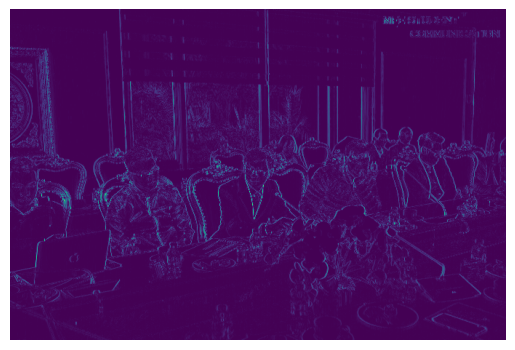

In [6]:
# Vertical filter
F2 = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

Y2 = conv2d(X, F2, s =3, p=0)
plt.imshow(Y2)
plt.axis('off')
plt.show()
